# Lung cancer prediction using Classification Model
## Logistic Regression

# import libraries

In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# load the dataset

In [11]:
df=pd.read_csv('lung_cancer_examples.csv')

In [6]:
# show the first few rows of the dataframe
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [12]:
# show last few rows of the dataframe
df.tail()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
54,Ernest,Borgnine,26,13,6,1,0
55,Alec,Guinness,77,20,5,4,1
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0


In [13]:
# delete first two columns
df = df.drop(df.columns[[0, 1]], axis=1)

In [8]:
# show the first few rows of the dataframe
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [14]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


In [15]:
# statistics of the dataframe
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


# visualize the data

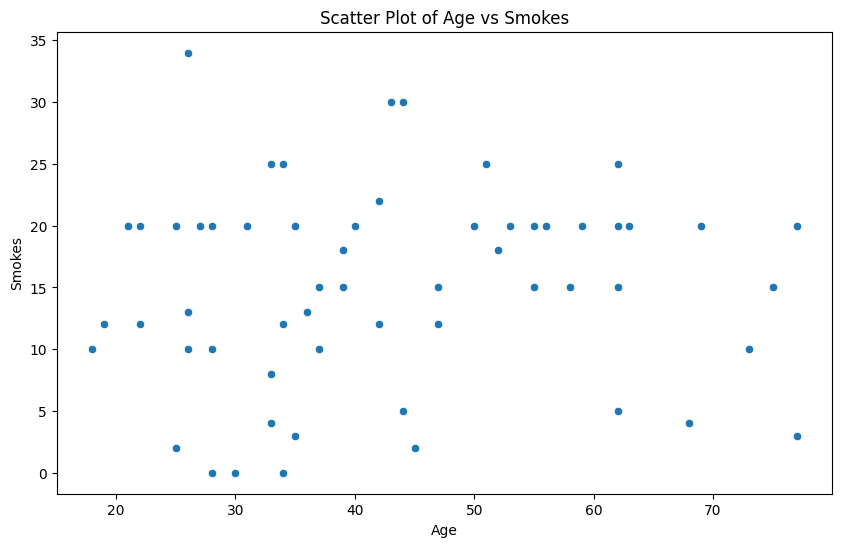

In [25]:
# scatter plot of the dataframe
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Smokes')
plt.title('Scatter Plot of Age vs Smokes')
plt.xlabel('Age')
plt.ylabel('Smokes')
plt.show()

# Null value 

In [27]:
df.isnull().sum()

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

# plot the null value

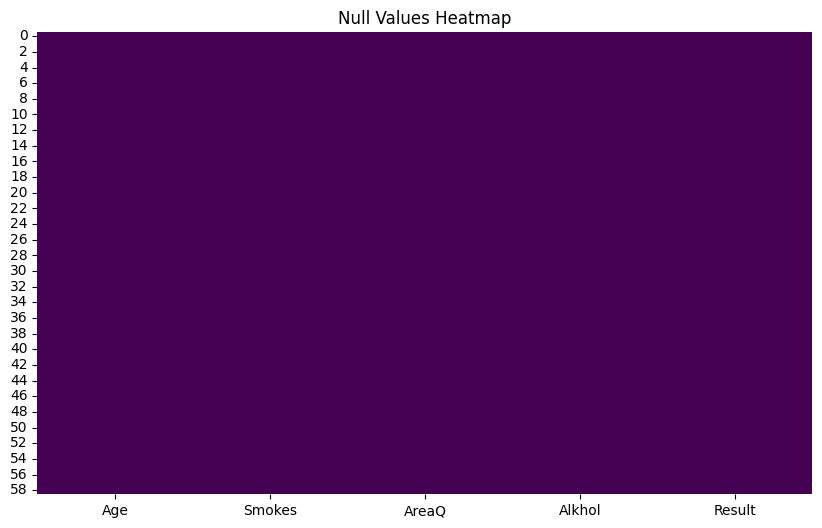

In [26]:
# check null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

# check outliers for columns


## age columns

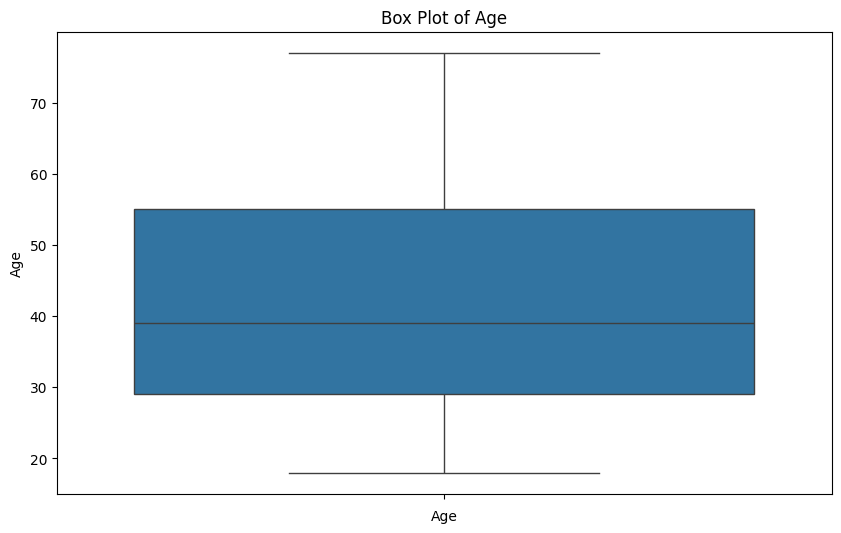

In [29]:
# check age column outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Age')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Smokes columns

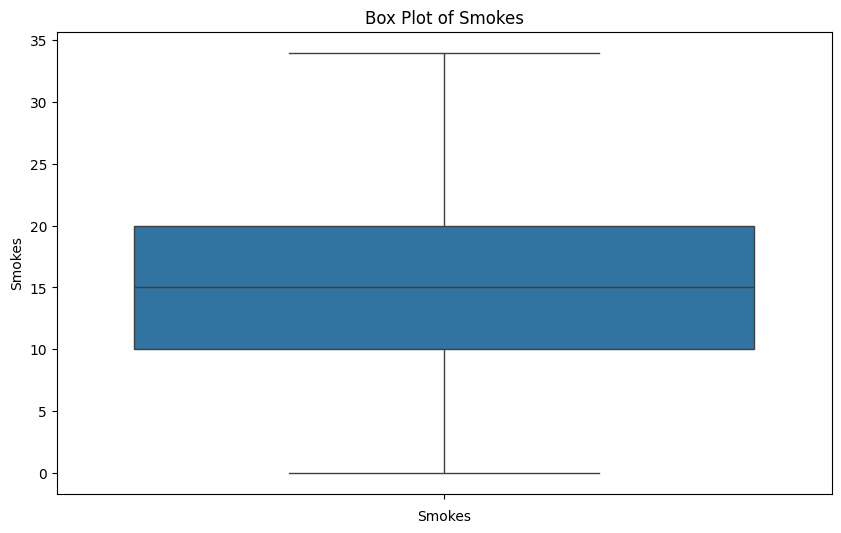

In [30]:
# check outliers for smokes column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Smokes')
plt.title('Box Plot of Smokes')
plt.xlabel('Smokes')
plt.show()

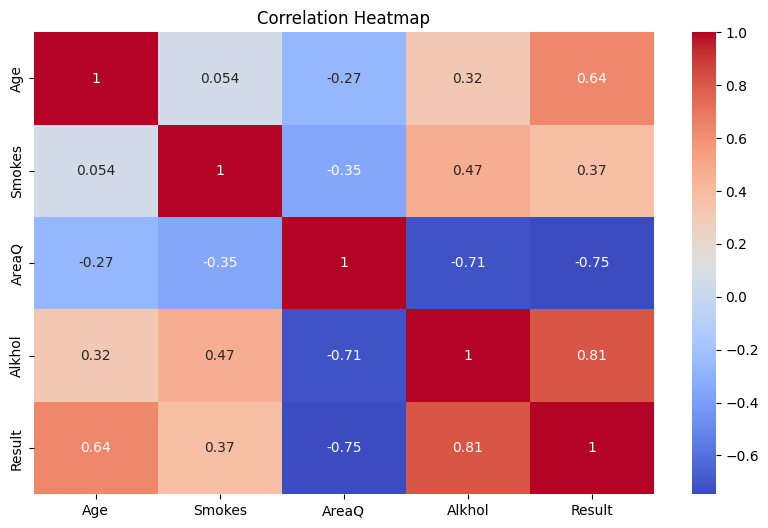

In [51]:
# heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# split the data target and feature

In [34]:
# split the data target and feature
x = df.drop('Result', axis=1)
y = df['Result']

In [35]:
x.shape, y.shape

((59, 4), (59,))

# train test split


In [36]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the value

In [41]:
# standard scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# model

In [42]:
# model
model = LogisticRegression()

In [46]:
# train the model
model.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
# predict the test set
y_pred = model.predict(x_test_scaled)

In [48]:
# show accuracy score confusion matrix and classification report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9166666666666666
Confusion Matrix:
 [[8 0]
 [1 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



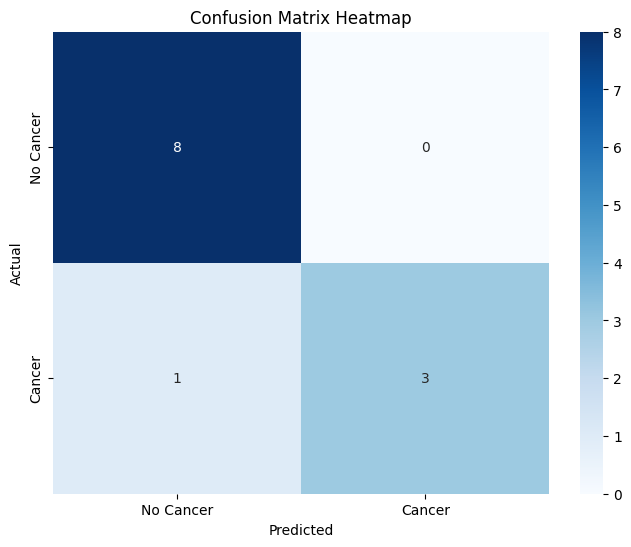

In [49]:
# heatmap of confusion matrix   
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
# save the model
import joblib
joblib.dump(model, 'lung_cancer_model.pkl')

['lung_cancer_model.pkl']